# Bank marketing Data Analysis

To find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, in this notebook we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

## Data

Dataset source is from Kaggle https://www.kaggle.com/janiobachmann/bank-marketing-dataset
 
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

- campaign: number of contacts performed during this campaign and for this client (numeric)
- pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

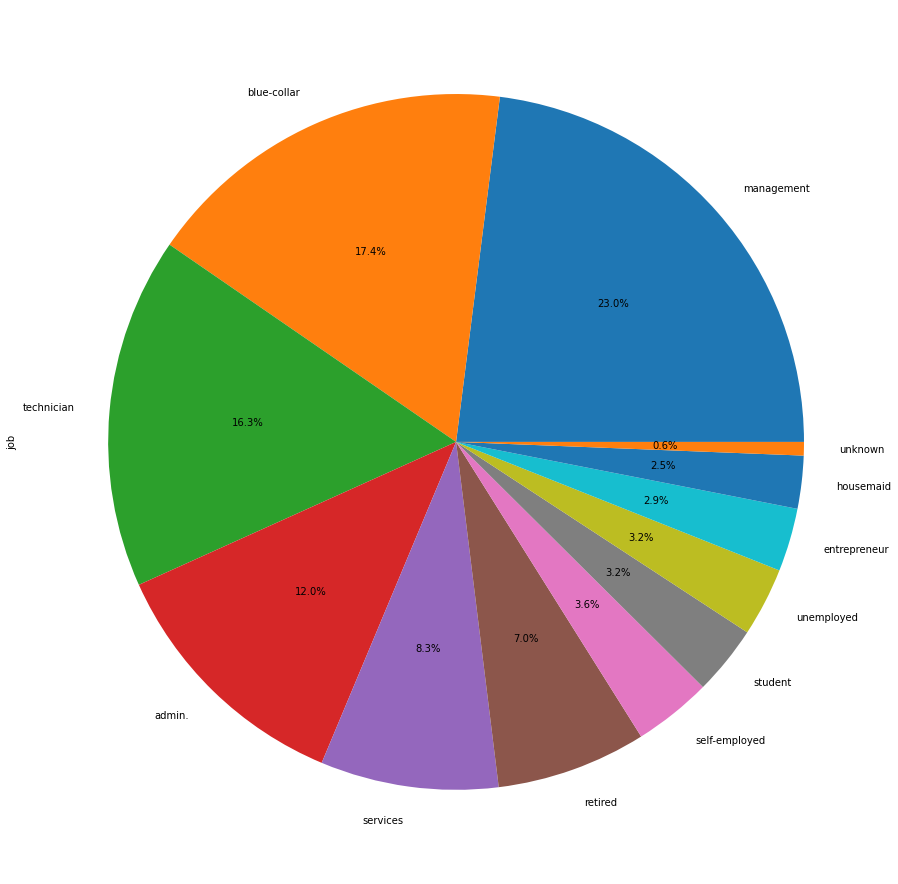

In [9]:
plt.figure(figsize=(20,16))
df['job'].value_counts().plot.pie(autopct='%1.1f%%')

Blue-collar,Management and Technicians constitutes 60% percent of the population.

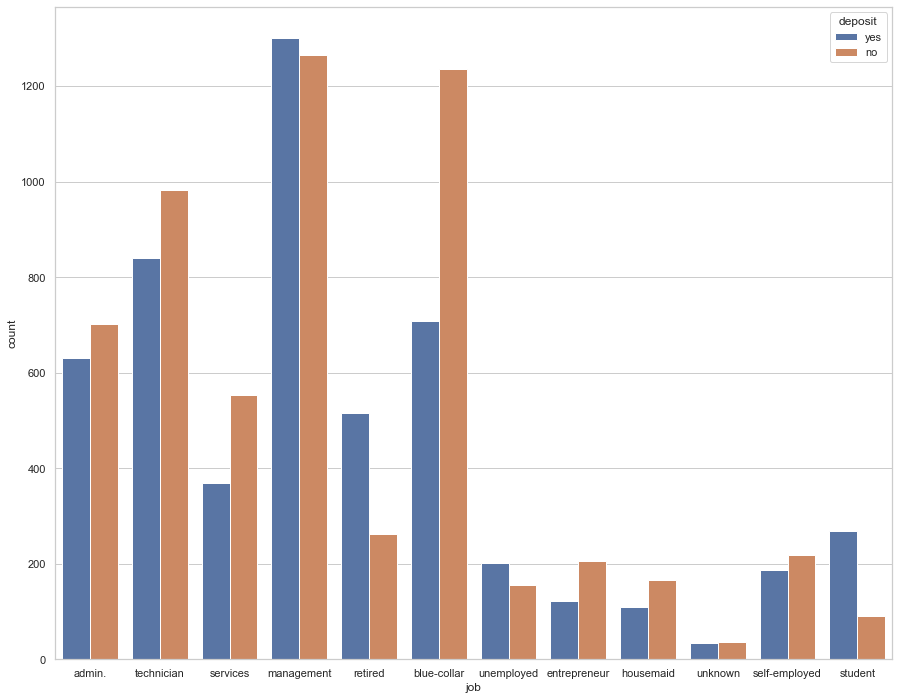

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,12))
sns.countplot(df['job'],hue='deposit',data=df)
plt.show()

<Figure size 1152x864 with 0 Axes>

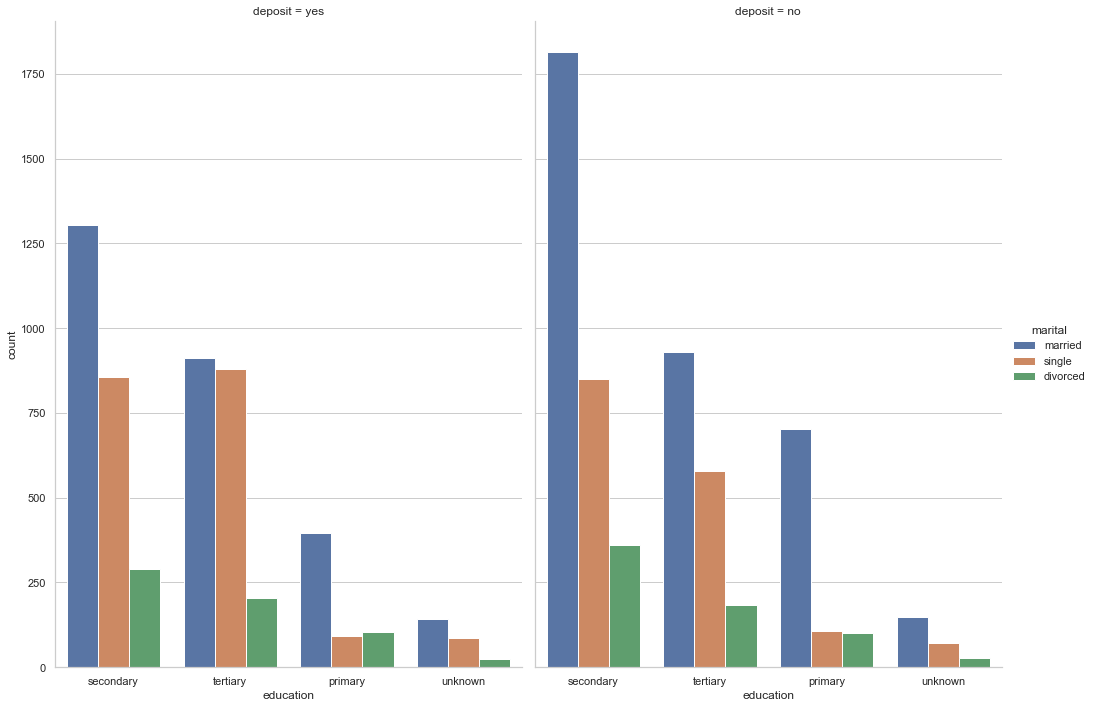

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,12))
sns.catplot(x="education", hue="marital", col="deposit",
                data=df, kind="count",
                height=10, aspect=.7);
plt.show()

In [13]:
df['deposit'].value_counts()/len(df)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

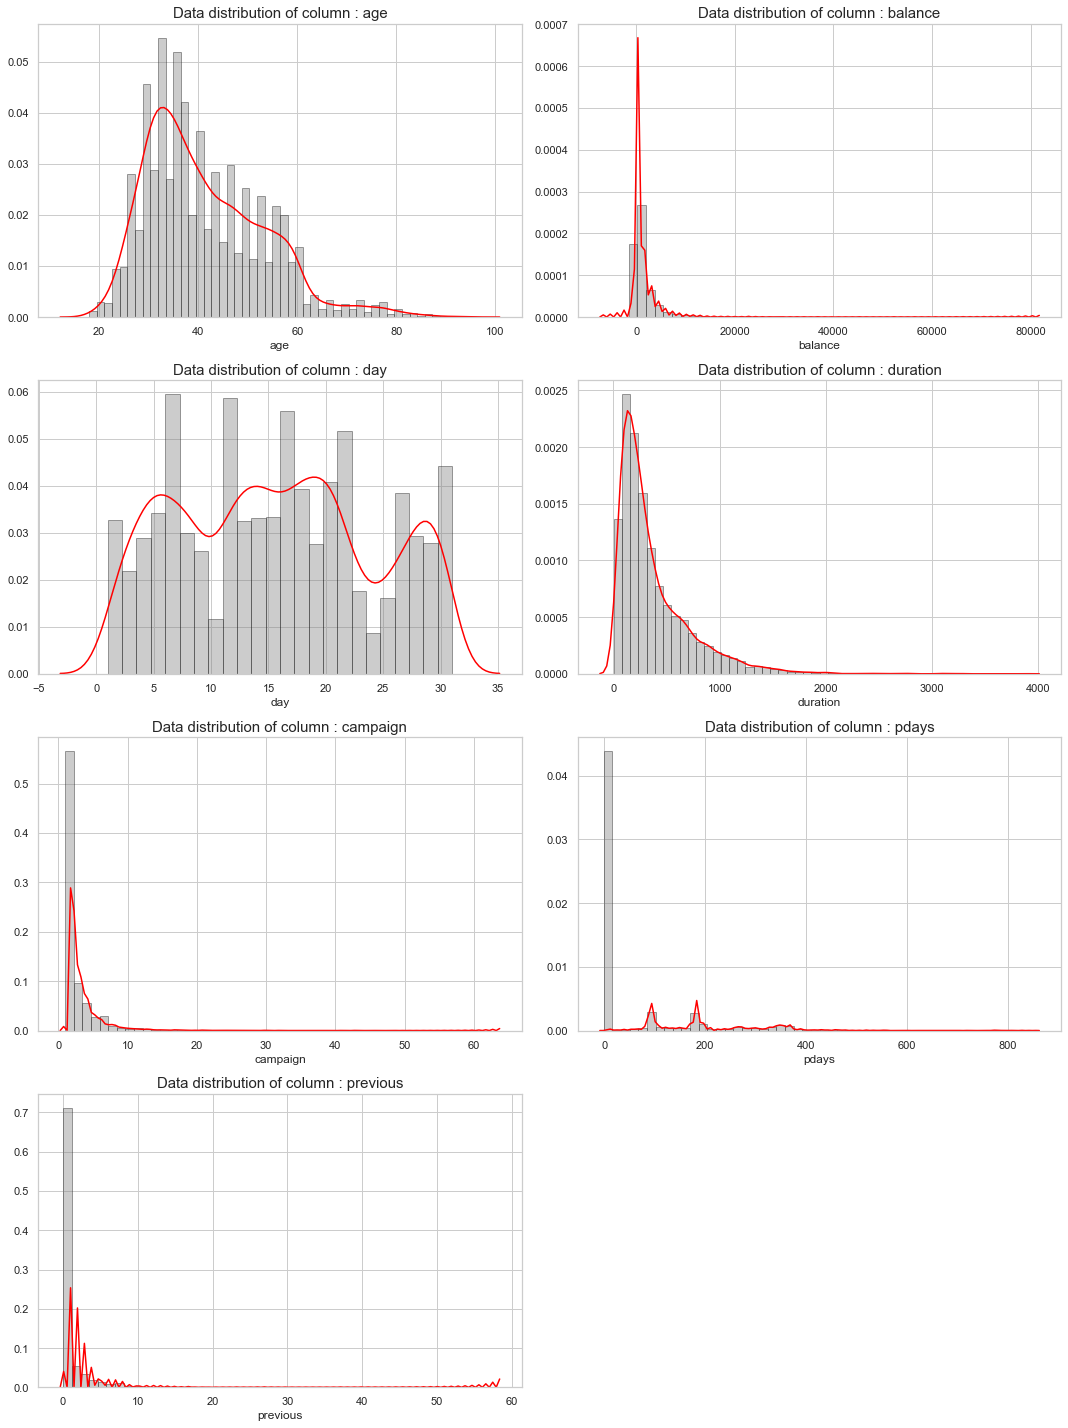

In [17]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i,col in enumerate(cols) :
    ax = plt.subplot(4,2,i+1)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
    plot_name = "Data distribution of column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 

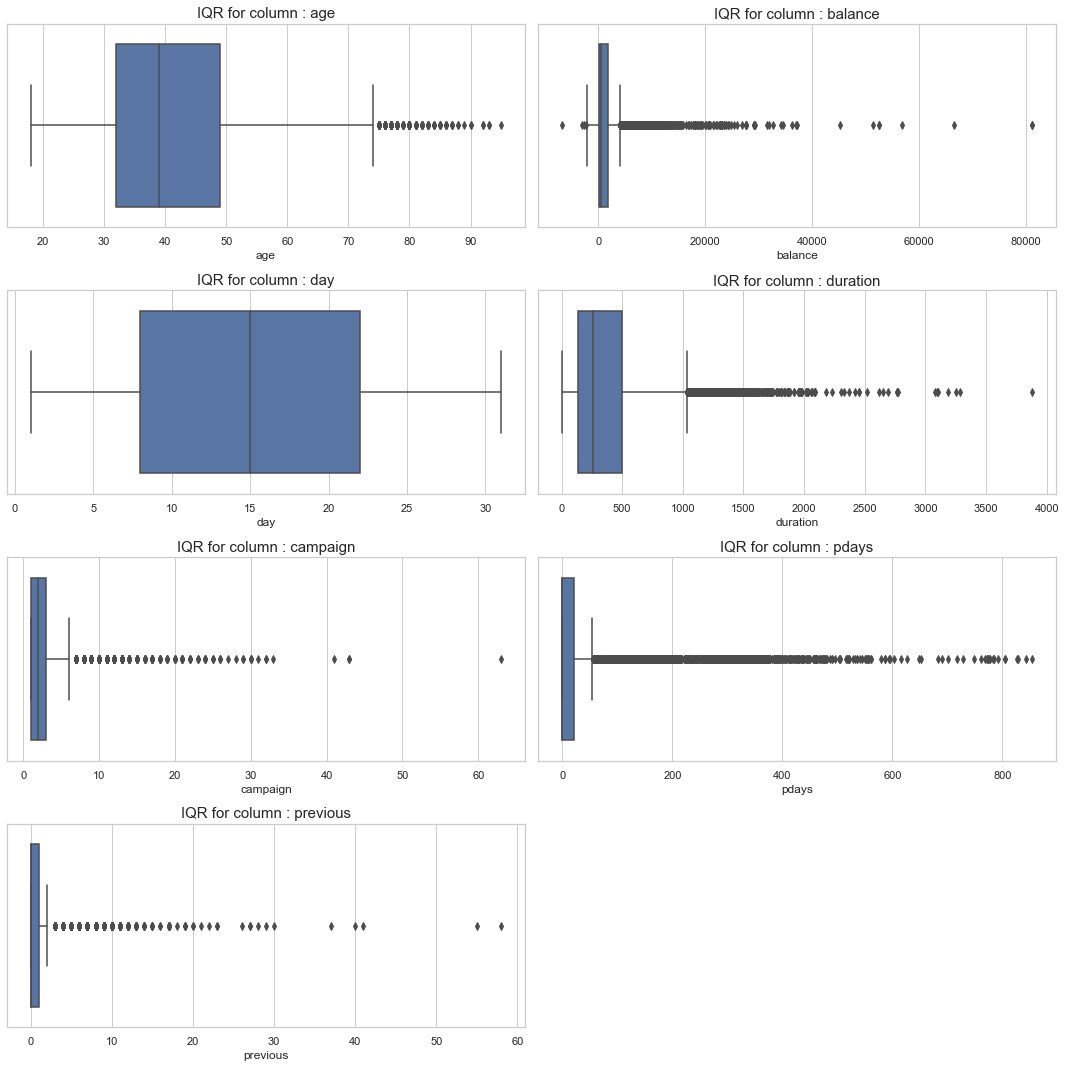

In [19]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,15])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i,col in enumerate(cols) :
    ax = plt.subplot(4,2,i+1)
    sns.boxplot(df[col])
    plot_name = "IQR for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 

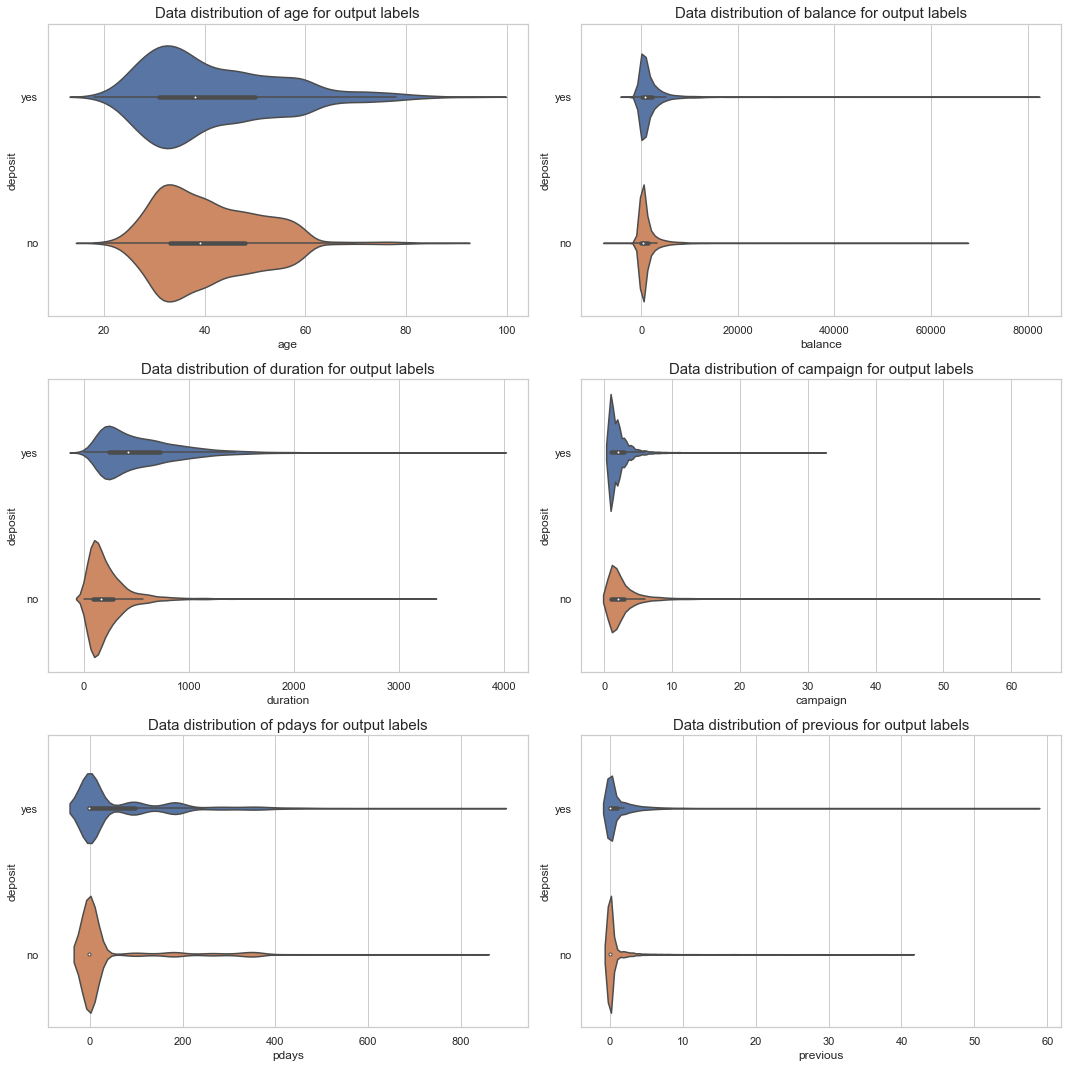

In [22]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,15])
cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for i,col in enumerate(cols) :
    ax = plt.subplot(3,2,i+1)
    sns.violinplot(data = df,x = col, y='deposit')
    plot_title = "Data distribution of "+col+" for output labels"
    ax.set_title(plot_title,fontsize = 15)
plt.tight_layout()
plt.show() 

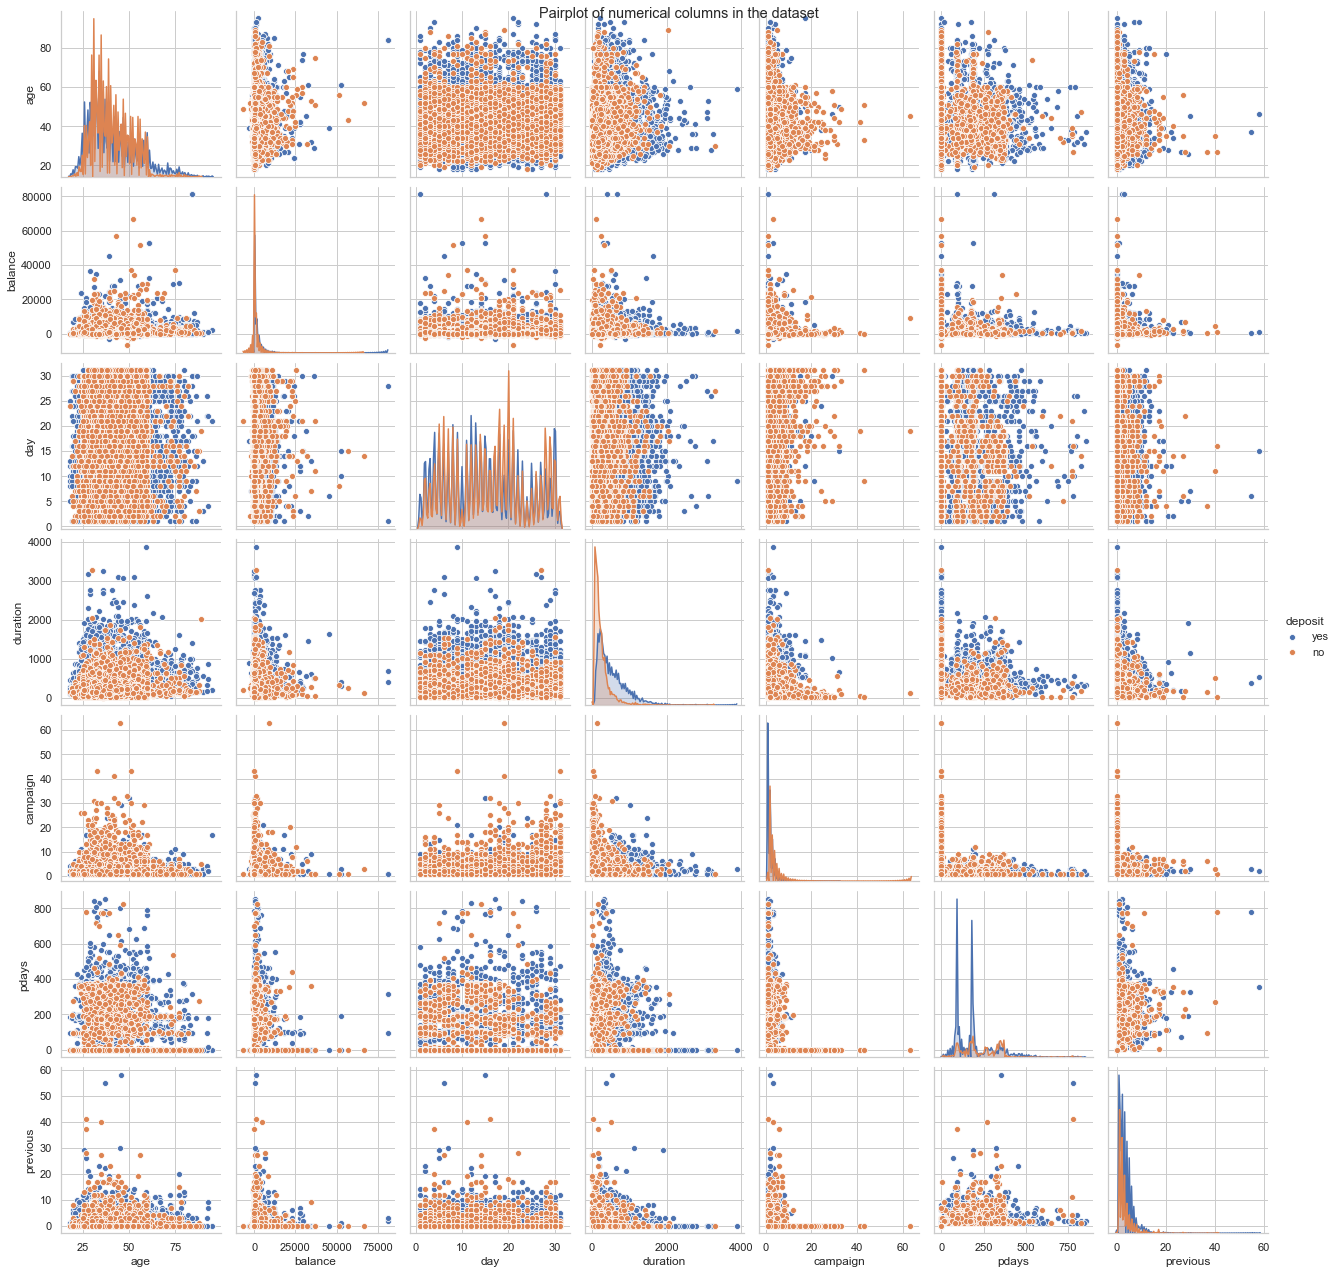

In [23]:
g = sns.pairplot(data = df,hue = "deposit",diag_kws={'bw': 0.2})
g.fig.suptitle("Pairplot of numerical columns in the dataset",y = 1)
plt.show()

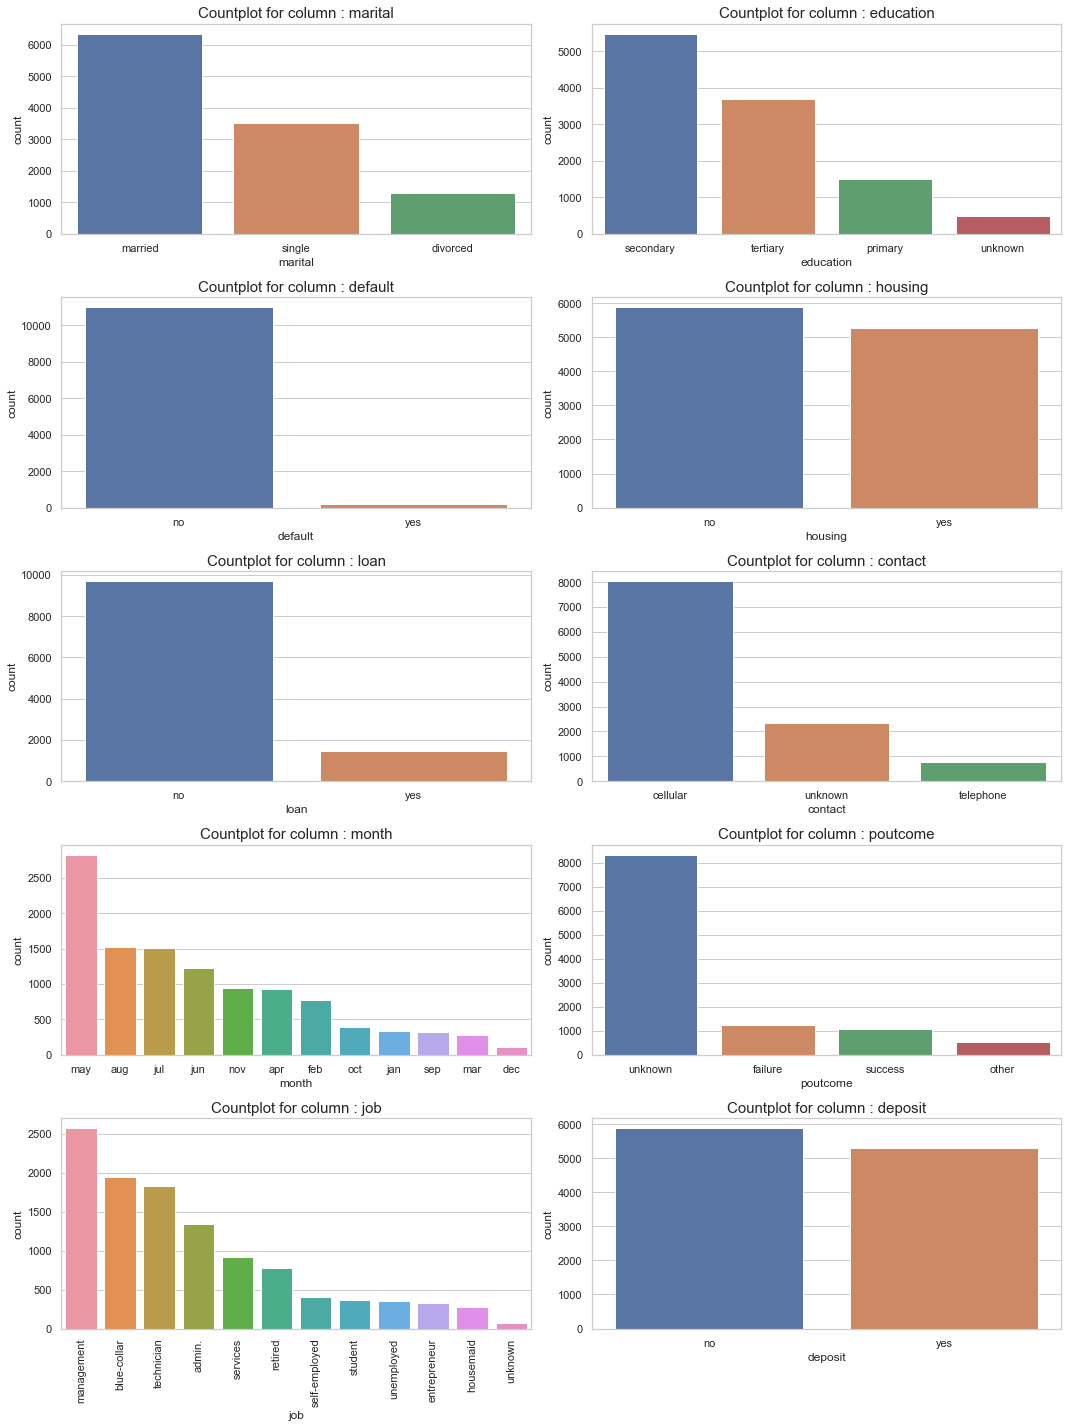

In [32]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'job', 'deposit']
for i,col in enumerate(cols) :
    ax = plt.subplot(5,2,i+1)
    sns.countplot(data = df, x = col, order = df[col].value_counts().index)
    if col == 'job' :
        plt.xticks(rotation = 90)
    plot_name = "Countplot for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show()  

In [33]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

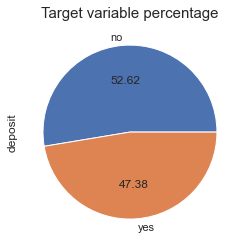

In [34]:
df['deposit'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Target variable percentage",fontsize = 15)
plt.show()

## Analysis of features for deposit = yes

In [35]:
df_yes = df[df['deposit']=='yes']
df_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


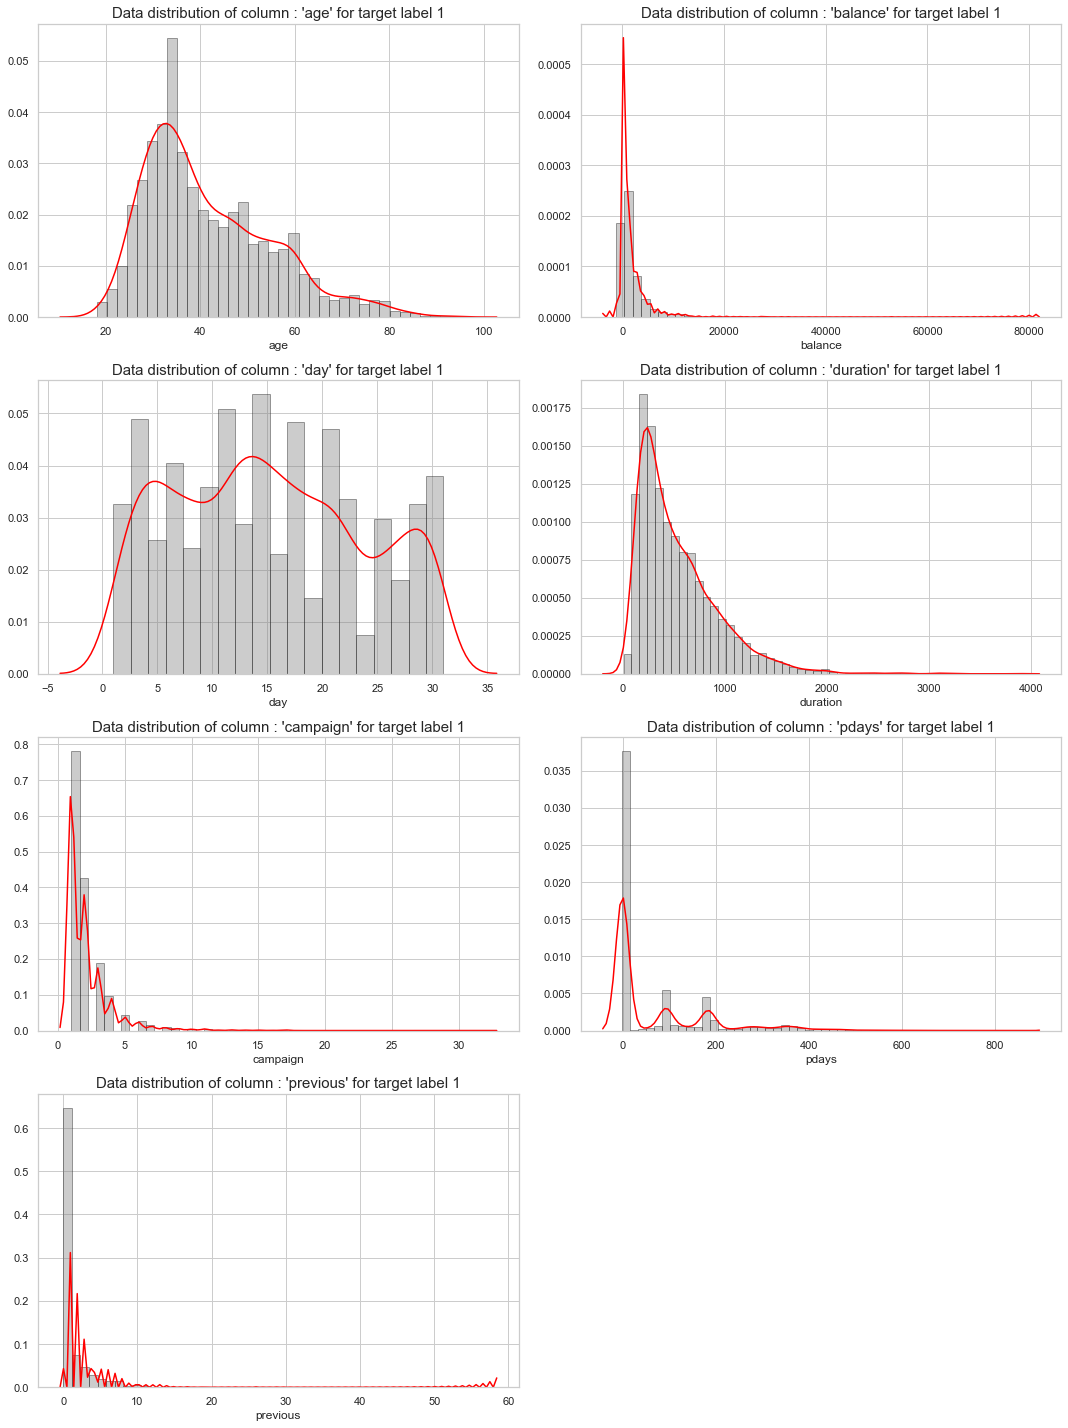

In [41]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i,col in enumerate(cols):
    ax = plt.subplot(4,2,i+1)
    sns.distplot(df_yes[col], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
    plot_name = "Data distribution of column : '"+col+"' for target label 1"
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 

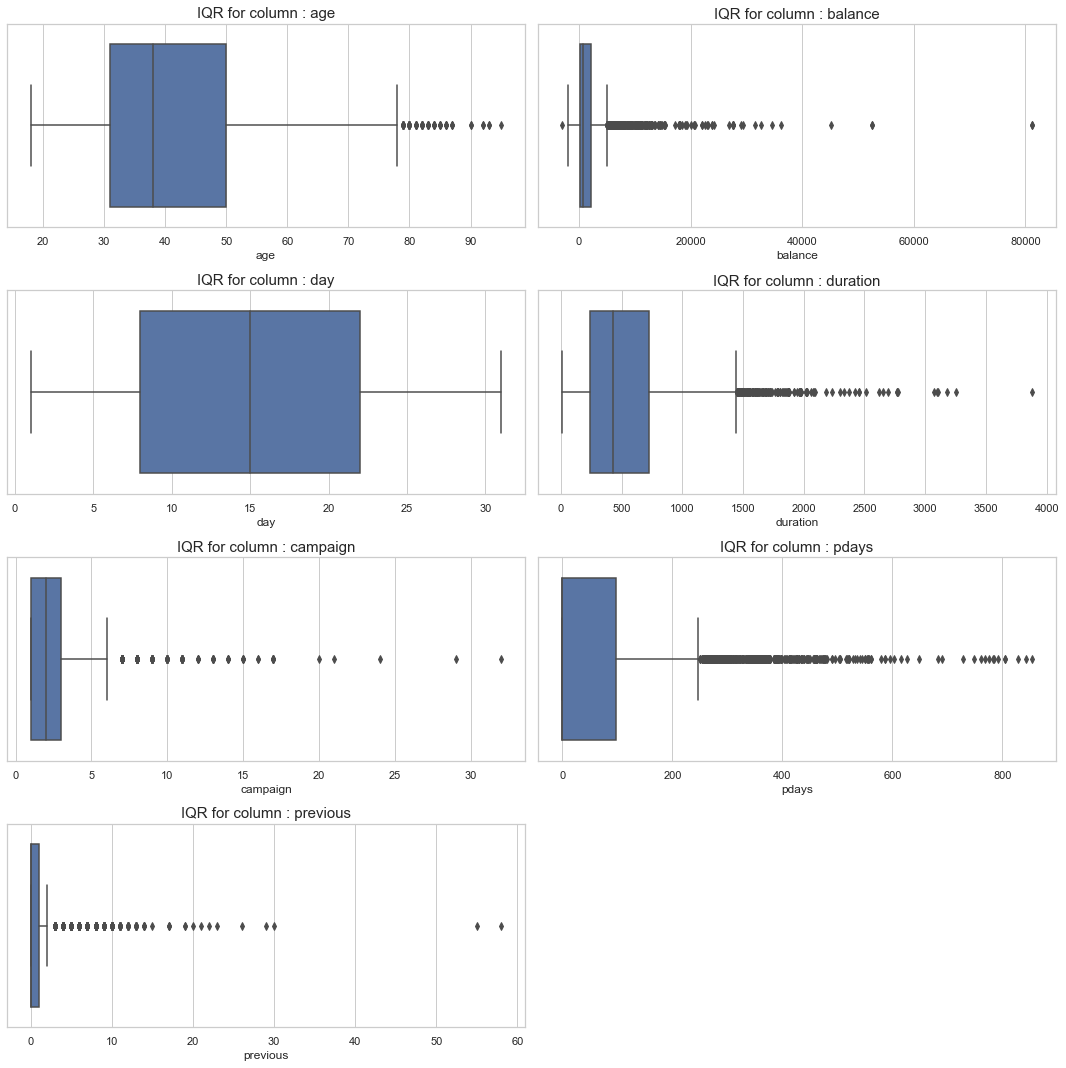

In [42]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,15])
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i,col in enumerate(cols) :
    ax = plt.subplot(4,2,i+1)
    sns.boxplot(df_yes[col])
    plot_name = "IQR for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show() 

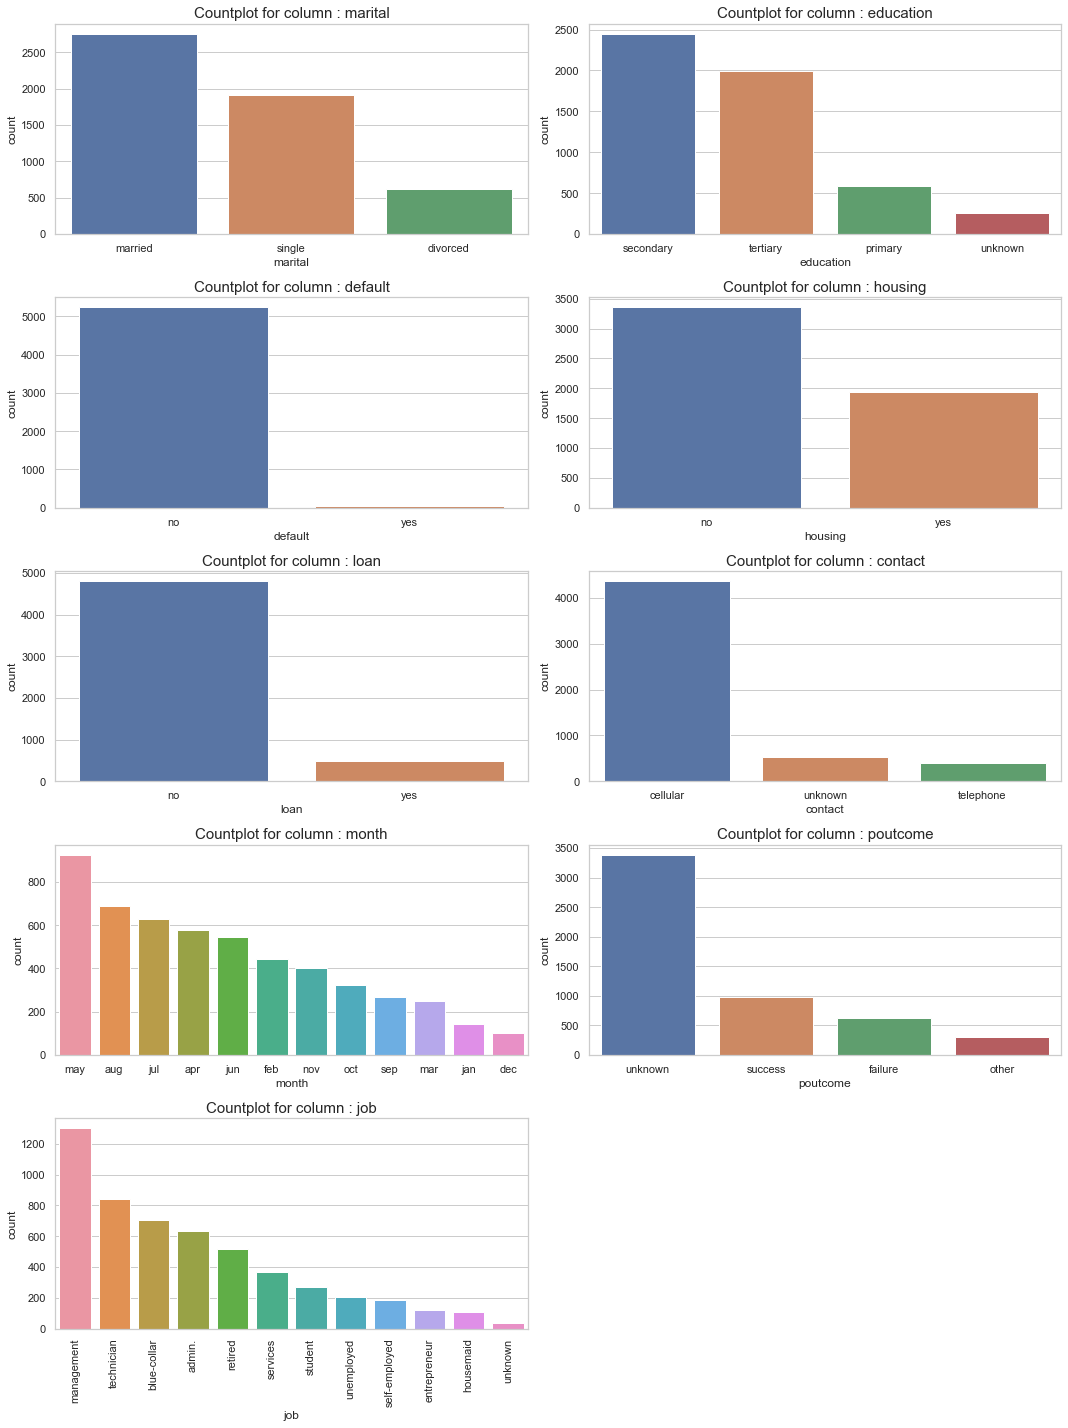

In [44]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'job']
for i,col in enumerate(cols) :
    ax = plt.subplot(5,2,i+1)
    sns.countplot(data = df_yes, x = col, order = df_yes[col].value_counts().index)
    if col == 'job' :
        plt.xticks(rotation = 90)
    plot_name = "Countplot for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show()  

### Converting Yes/No to 0/1

In [47]:
varlist =  ['housing', 'loan', 'default', 'deposit']
def binary_varlist(x):
    if x=='yes': return 1
    else: return 0
for i in varlist:
    df[i]=df[i].apply(binary_varlist)

In [48]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


### Converting month to numerical column

In [50]:
def month_converter(month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months.index(month) + 1


In [51]:
df['month'] = df['month'].apply(month_converter)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,673,2,-1,0,unknown,1


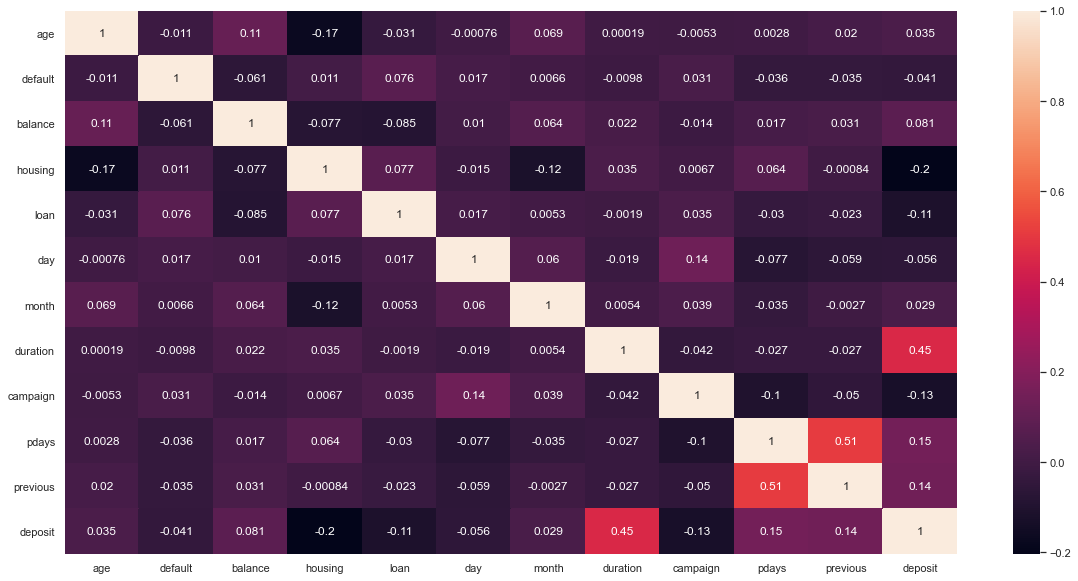

In [52]:
# correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- The best correlation is between pdays and previous.
- Duration and Deposit also has good correlation.

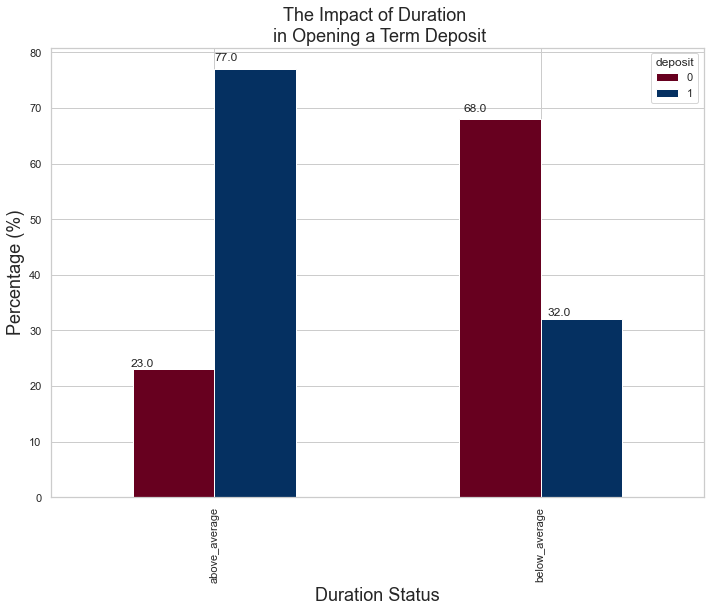

In [66]:
# Duration of the campaign also plays a great role,has a good correlation with deposit subscription.

# this code snippet is forked.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

### Creating dummy variables for categorical data [One-hot encoding]

In [54]:
dummy = pd.get_dummies(df[['marital', 'education', 'contact', 'poutcome', 'job']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [55]:
df.shape

(11162, 38)

In [56]:
df = df.drop(['marital', 'education', 'contact', 'poutcome', 'job'], 1)
df.shape

(11162, 33)

### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['age','balance','day','month','duration','campaign', 'pdays', 'previous']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1.491505,0,0.252525,1,0,-1.265746,-0.462874,1.930226,-0.554168,-0.481184,...,0,0,0,0,0,0,0,0,0,0
1,1.239676,0,-0.459974,0,0,-1.265746,-0.462874,3.154612,-0.554168,-0.481184,...,0,0,0,0,0,0,0,0,0,0
2,-0.019470,0,-0.080160,1,0,-1.265746,-0.462874,2.929901,-0.554168,-0.481184,...,0,0,0,0,0,0,0,1,0,0
3,1.155733,0,0.293762,1,0,-1.265746,-0.462874,0.596366,-0.554168,-0.481184,...,0,0,0,0,0,1,0,0,0,0
4,1.071790,0,-0.416876,0,0,-1.265746,-0.462874,0.867171,-0.186785,-0.481184,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   default              11162 non-null  int64  
 2   balance              11162 non-null  float64
 3   housing              11162 non-null  int64  
 4   loan                 11162 non-null  int64  
 5   day                  11162 non-null  float64
 6   month                11162 non-null  float64
 7   duration             11162 non-null  float64
 8   campaign             11162 non-null  float64
 9   pdays                11162 non-null  float64
 10  previous             11162 non-null  float64
 11  deposit              11162 non-null  int64  
 12  marital_married      11162 non-null  uint8  
 13  marital_single       11162 non-null  uint8  
 14  education_secondary  11162 non-null  uint8  
 15  education_tertiary   11162 non-null 